In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import textwrap
from wordcloud import WordCloud, STOPWORDS 

In [2]:
data = pd.read_csv('DataScientist.csv')
data.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


# Preprocessing Data

## Drop Columns and Rows

In [3]:
# Drop Columns
data.drop(['Unnamed: 0', 'Company Name', 'Headquarters','Competitors'], axis = 1, inplace = True)
data = data.set_index(['index'])

In [4]:
# Change data with -1 values into NaN
data = data.replace([-1, -1.0, '-1'], np.nan)
print(data.isnull().sum(axis = 0))

Job Title               0
Salary Estimate         0
Job Description         0
Rating                409
Location                0
Size                  229
Founded               977
Type of ownership     229
Industry              546
Sector                546
Revenue               229
Easy Apply           3745
dtype: int64


In [5]:
# fill row data contain nan values in columns Easy Apply
data['Easy Apply'].fillna('FALSE', inplace = True)
# Drop row data contain nan values
data.dropna(axis = 0, inplace = True)
data

,Job Title,Salary Estimate,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply
index,,,,,,,,,,,,
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,"New York, NY",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,FALSE
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,"New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,FALSE
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,"Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,FALSE
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,"New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,FALSE
5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,"New York, NY",201 to 500 employees,1985.0,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...
4373,Columbus Data Science Tutor Jobs,$55K-$112K (Glassdoor est.),#Columbus Data Science Tutor Jobs\n\nVarsity T...,4.2,"Columbus, OH",201 to 500 employees,2007.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,FALSE
4374,Cyber Security Data Engineer,$55K-$112K (Glassdoor est.),ApTask is a leading staffing and recruitment c...,3.9,"Dublin, OH",201 to 500 employees,2010.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),FALSE
4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,"Dublin, OH",201 to 500 employees,2011.0,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),FALSE


## Cleaning Columns

## Cleaning Job Title Columns

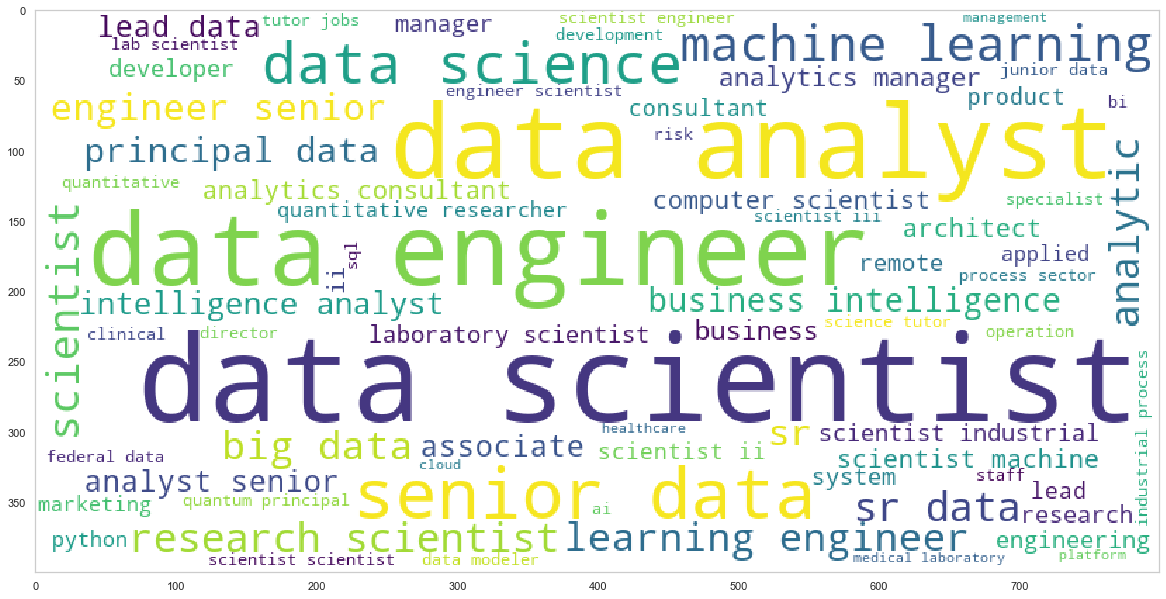

In [6]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in data['Job Title']:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white'
                      , stopwords = stopwords, min_font_size = 10).generate(comment_words)

fig, ax = plt.subplots(figsize = (16, 16))
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
plt.show()

from the figure above, we know open recruitments its not only for data scientist job. So, we drop data which doesn't contain data scientist or data science in Job title columns, because we want to explore only data scientist jobs.

In [7]:
data = data[data['Job Title'].str.contains('Data Scientist|Data Science')]
data

,Job Title,Salary Estimate,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply
index,,,,,,,,,,,,
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,"New York, NY",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,FALSE
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,"New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,FALSE
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,"New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,FALSE
5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,"New York, NY",201 to 500 employees,1985.0,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,FALSE
10,Data Scientist,$111K-$181K (Glassdoor est.),Company Description:\n\nQuartet is a pioneerin...,3.9,"New York, NY",201 to 500 employees,2014.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...
4290,"Data Scientist Lead, Capacity Planning & Analy...",$52K-$94K (Glassdoor est.),The Business Planning and Analysis (BP&A) team...,3.9,"Columbus, OH",10000+ employees,1799.0,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD),FALSE
4301,"Principal Data Scientist, Pricing",$55K-$113K (Glassdoor est.),We believe a large part of building an effecti...,3.8,"Columbus, OH",501 to 1000 employees,2015.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),FALSE
4349,CCB F&BM - Quantitative Modeling/Data Science ...,$39K-$86K (Glassdoor est.),JPMorgan Chase& Co. (NYSE: JPM) is a leading g...,3.9,"Columbus, OH",10000+ employees,1799.0,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD),FALSE


### Cleaning Salary Column Values

In [8]:
data['Salary Estimate']= data['Salary Estimate'].str.replace('(', '').str.replace(')', '').str.replace('Glassdoor est.', '').str.replace('Employer est.', '')

D:\application\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
data['Min Salary'],data['Max Salary']=data['Salary Estimate'].str.split('-').str
data['Min Salary']=data['Min Salary'].str.strip(' ').str.strip('$').str.strip('K').fillna(0).astype(int)
data['Max Salary'] = data['Max Salary'].str.replace('Per Hour','')
data['Max Salary']=data['Max Salary'].str.strip(' ').str.strip('$').str.strip('K').fillna(0).astype(int)
data[['Salary Estimate','Min Salary', 'Max Salary']]



D:\application\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\application\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\application\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,Salary Estimate,Min Salary,Max Salary
index,,,
0,$111K-$181K,111,181
1,$111K-$181K,111,181
4,$111K-$181K,111,181
5,$111K-$181K,111,181
10,$111K-$181K,111,181
...,...,...,...
4290,$52K-$94K,52,94
4301,$55K-$113K,55,113
4349,$39K-$86K,39,86


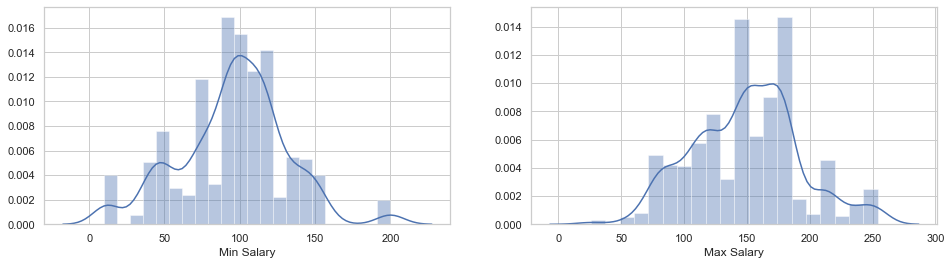

In [10]:
fig, ax = plt.subplots(1,2, figsize = (16,4))

sns.distplot(ax = ax[0], a = data['Min Salary'])

sns.distplot( ax = ax[1], a = data['Max Salary'])
plt.show()

### Cleaning Revenue Column Values

In [11]:
data['Revenue'].replace(['Unknown / Non-Applicable'], np.nan, inplace = True)
data[['Revenue']]

D:\application\Anaconda\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Revenue
index,
0,NaN
1,NaN
4,NaN
5,NaN
10,NaN
...,...
4290,$10+ billion (USD)
4301,$100 to $500 million (USD)
4349,$10+ billion (USD)


# Analysis and Visualization

# Location

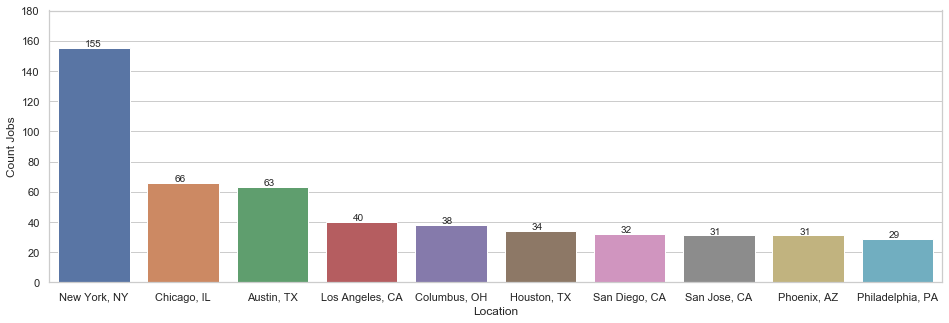

In [12]:
dataview = data.groupby('Location')['Job Title'].count().reset_index()
dataview = dataview.sort_values('Job Title', ascending = False).head(10)

fig, ax = plt.subplots(figsize = (16,5))
sns.barplot(data = dataview, x = 'Location', y = 'Job Title', ax = ax)
ax.set_ylabel('Count Jobs')
ax.set_yticks(np.arange(0, 200, step = 20))
for index,dataview in enumerate(dataview['Job Title'].astype(int)):
       ax.text(x=index-0.1 , y =dataview+1 , s=f"{dataview}" , fontdict=dict(fontsize=10))
plt.show()

## Location vs Sector

In [13]:
dataview = data.pivot_table(index = 'Location', columns = 'Sector', values = 'Job Title', aggfunc = 'count')
dataview.fillna(0, inplace = True)
dataview['Total'] = dataview.sum(axis = 1)
dataview.reset_index(inplace = True)
dataview.sort_values('Total', ascending = False).head(10)

Sector,Location,Accounting & Legal,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,Consumer Services,Education,Finance,...,Media,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,"Restaurants, Bars & Food Services",Retail,Telecommunications,Transportation & Logistics,Travel & Tourism,Total
58,"New York, NY",0.0,0.0,2.0,0.0,2.0,32.0,3.0,2.0,15.0,...,6.0,2.0,1.0,0.0,0.0,9.0,0.0,0.0,1.0,155.0
14,"Chicago, IL",0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,5.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,66.0
4,"Austin, TX",6.0,3.0,0.0,0.0,0.0,2.0,1.0,7.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,63.0
48,"Los Angeles, CA",0.0,0.0,0.0,0.0,1.0,5.0,0.0,2.0,1.0,...,5.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,40.0
15,"Columbus, OH",0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,38.0
37,"Houston, TX",1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0
75,"San Diego, CA",0.0,1.0,0.0,0.0,4.0,7.0,0.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,32.0
76,"San Jose, CA",0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
66,"Phoenix, AZ",0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
65,"Philadelphia, PA",0.0,0.0,0.0,1.0,1.0,4.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0


In [14]:
pd.melt(dataview, 
            id_vars=['Location'], 
            value_vars=list(dataview.columns[1:-1]), # list of days of the week
            var_name='Sector', 
            value_name='Sum of Value').sort_values('Sum of Value', ascending = False)

,Location,Sector,Sum of Value
1147,"New York, NY",Information Technology,61.0
1093,"Austin, TX",Information Technology,36.0
1103,"Chicago, IL",Information Technology,34.0
553,"New York, NY",Business Services,32.0
1165,"San Jose, CA",Information Technology,26.0
...,...,...,...
766,"San Antonio, TX",Education,0.0
765,"Rosemont, IL",Education,0.0
764,"Rockville Centre, NY",Education,0.0
763,"Richardson, TX",Education,0.0


In [15]:
dataview1 = dataview.sort_values('Total', ascending = False).head(5)


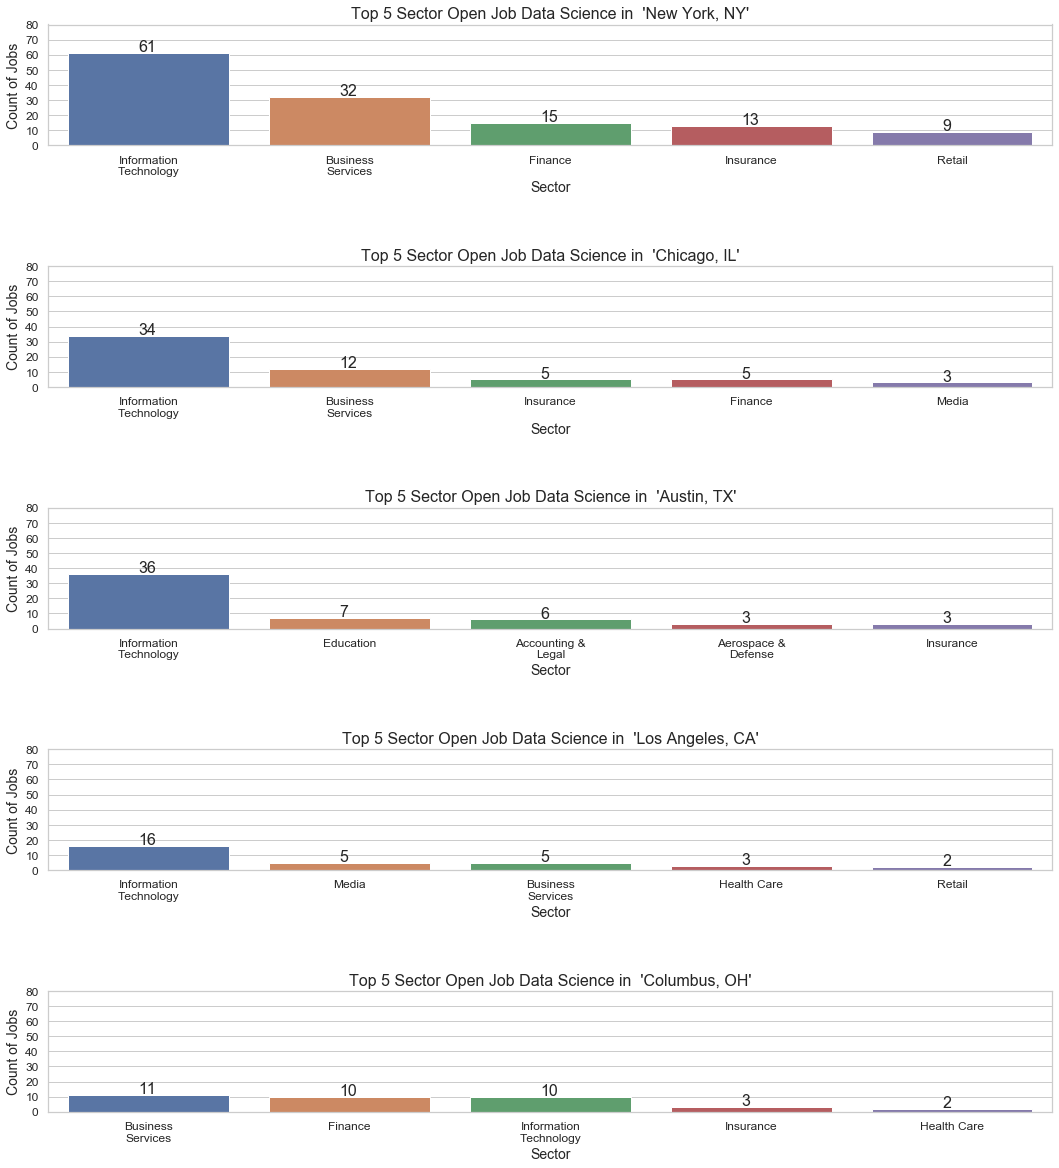

In [16]:
max_width = 15
fig, ax = plt.subplots(5,1 , figsize = (18,20))
for i in range(0,5):
    dataview1 = dataview.sort_values('Total', ascending = False).head(5)
    dataview1 = dataview1[i:i+1]
    dataview1.dropna(axis = 1, inplace = True)
    dataview1 = pd.melt(dataview1, 
                id_vars=['Location'], 
                value_vars=list(dataview1.columns[1:-1]), # list of days of the week
                var_name='Sector', 
                value_name='Sum of Value').sort_values('Sum of Value', ascending = False)
    
    dataview1 = dataview1.sort_values('Sum of Value', ascending = False).head(5)
    sns.barplot(ax=ax[i], data = dataview1, x ='Sector', y = 'Sum of Value')
    ax[i].set_title("Top 5 Sector Open Job Data Science in  '"+ dataview1.iloc[0,0]+"'", fontsize = 16)
    ax[i].set_xlabel('Sector', fontsize = 14)
    ax[i].set_ylabel('Count of Jobs', fontsize = 14)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 85, step = 10))
    ax[i].tick_params(labelsize = 12)

    
    for index,dataview1 in enumerate(dataview1['Sum of Value'].astype(int)):
        ax[i].text(x=index-0.05 , y =dataview1+1 , s=f"{dataview1}" , fontdict=dict(fontsize=16))
    fig.subplots_adjust(wspace = 0.1, hspace = 1)
plt.show()

## Location vs Industry

In [17]:
dataview = data.pivot_table(index = 'Location', columns = 'Industry', values = 'Job Title', aggfunc = 'count')
dataview.fillna(0, inplace = True)
dataview['Total'] = dataview.sum(axis = 1)
dataview.reset_index(inplace = True)
dataview.sort_values('Total', ascending = False).head(10)

Industry,Location,Accounting,Advertising & Marketing,Aerospace & Defense,Architectural & Engineering Services,Audiovisual,Automotive Parts & Accessories Stores,Banks & Credit Unions,Biotech & Pharmaceuticals,Brokerage Services,...,TV Broadcast & Cable Networks,Telecommunications Services,Transportation Equipment Manufacturing,Transportation Management,Travel Agencies,Utilities,Vehicle Dealers,Video Games,Wholesale,Total
58,"New York, NY",0.0,11.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,155.0
14,"Chicago, IL",0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
4,"Austin, TX",6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,63.0
48,"Los Angeles, CA",0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,40.0
15,"Columbus, OH",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
37,"Houston, TX",1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,34.0
75,"San Diego, CA",0.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
76,"San Jose, CA",0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
66,"Phoenix, AZ",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
65,"Philadelphia, PA",0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0


In [18]:
pd.melt(dataview, 
            id_vars=['Location'], 
            value_vars=list(dataview.columns[1:-1]), # list of days of the week
            var_name='Industry', 
            value_name='Sum of Value').sort_values('Sum of Value', ascending = False)

,Location,Industry,Sum of Value
4414,"New York, NY",Internet,33.0
1364,"Santa Clara, CA",Computer Hardware & Software,19.0
1291,"Austin, TX",Computer Hardware & Software,17.0
4408,"Menlo Park, CA",Internet,13.0
4036,"San Jose, CA",IT Services,11.0
...,...,...,...
2448,"Rosemont, IL",Express Delivery Services,0.0
2447,"Rockville Centre, NY",Express Delivery Services,0.0
2446,"Richardson, TX",Express Delivery Services,0.0
2445,"Redwood City, CA",Express Delivery Services,0.0


In [19]:
dataview1 = dataview.sort_values('Total', ascending = False).head(5)


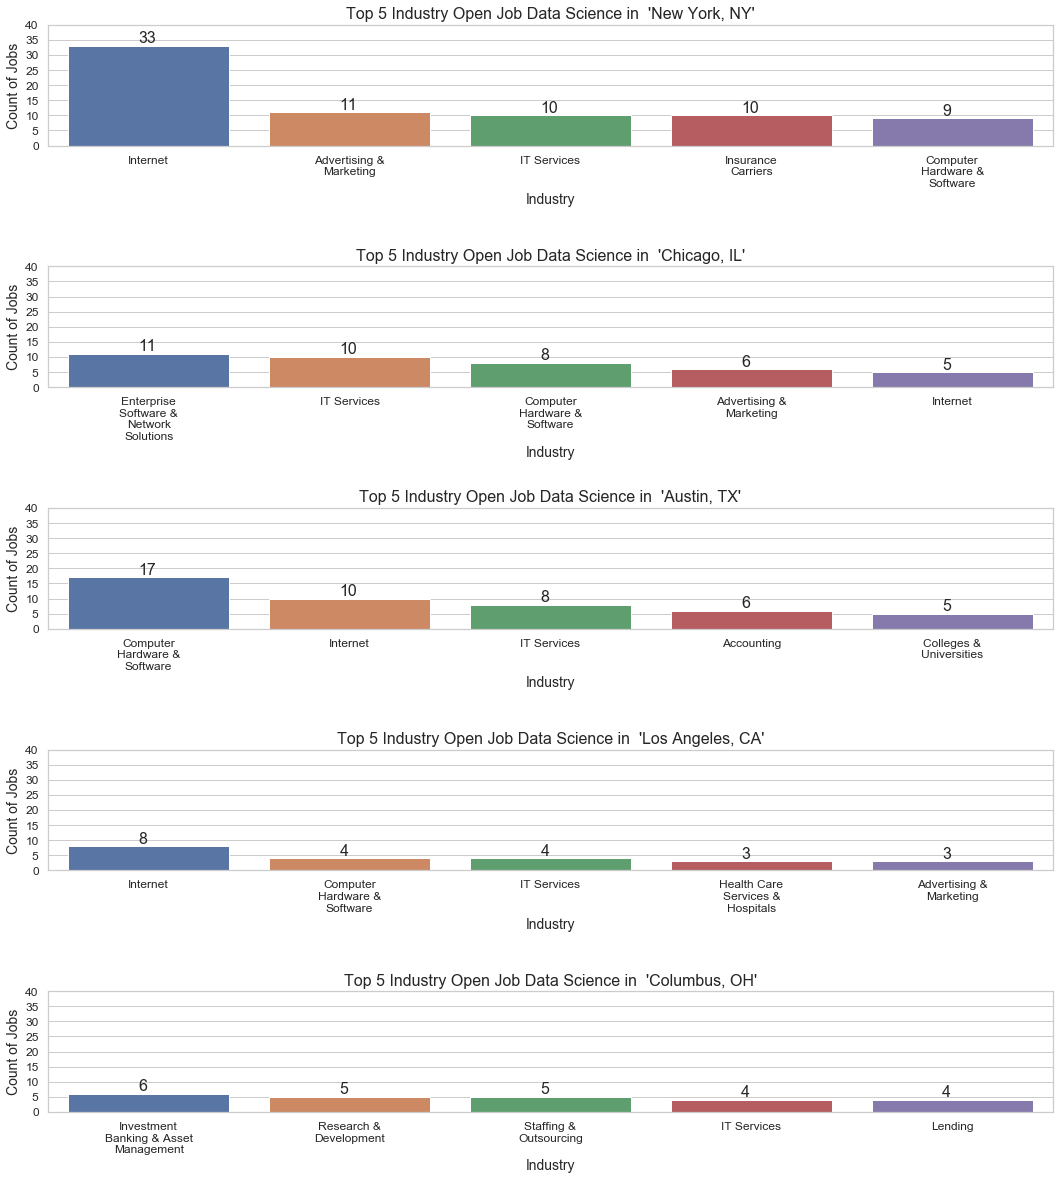

In [20]:
max_width = 15
fig, ax = plt.subplots(5,1 , figsize = (18,20))
for i in range(0,5):
    dataview1 = dataview.sort_values('Total', ascending = False).head(5)
    dataview1 = dataview1[i:i+1]
    dataview1.dropna(axis = 1, inplace = True)
    dataview1 = pd.melt(dataview1, 
                id_vars=['Location'], 
                value_vars=list(dataview1.columns[1:-1]), 
                var_name='Industry', 
                value_name='Sum of Value').sort_values('Sum of Value', ascending = False)
    
    dataview1 = dataview1.sort_values('Sum of Value', ascending = False).head(5)
    
    sns.barplot(ax=ax[i], data = dataview1, x ='Industry', y = 'Sum of Value')
    ax[i].set_title("Top 5 Industry Open Job Data Science in  '"+ dataview1.iloc[0,0]+"'", fontsize = 16)
    ax[i].set_xlabel('Industry', fontsize = 14)
    ax[i].set_ylabel('Count of Jobs', fontsize = 14)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 45, step = 5))
    ax[i].tick_params(labelsize = 12)
    
    for index,dataview1 in enumerate(dataview1['Sum of Value'].astype(int)):
        ax[i].text(x=index-0.05 , y =dataview1+1 , s=f"{dataview1}" , fontdict=dict(fontsize=16))
    fig.subplots_adjust(wspace = 0.1, hspace = 1)
plt.show()

## Location Vs Salary Estimate

In [21]:
dataview = data.pivot_table(index = 'Location', columns = 'Salary Estimate', values = 'Job Title', aggfunc = 'count')
#dataview.replace(0, inplace = True)
dataview['Total'] = dataview.sum(axis = 1)
dataview.reset_index(inplace = True)
dataview.sort_values('Total', ascending = False).head(10)

Salary Estimate,Location,$10-$26 Per Hour,$100K-$152K,$100K-$163K,$100K-$172K,$102K-$121K,$102K-$164K,$102K-$179K,$110K-$139K,$111K-$175K,...,$94K-$166K,$96K-$119K,$96K-$155K,$97K-$111K,$97K-$159K,$98K-$152K,$98K-$160K,$99K-$173K,$99K-$174K,Total
58,"New York, NY",NaN,NaN,NaN,NaN,16.0,NaN,NaN,5.0,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0
14,"Chicago, IL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,66.0
4,"Austin, TX",NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
48,"Los Angeles, CA",NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0
15,"Columbus, OH",NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,38.0
37,"Houston, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
75,"San Diego, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
76,"San Jose, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
66,"Phoenix, AZ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,9.0,NaN,NaN,NaN,NaN,31.0
65,"Philadelphia, PA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0


In [22]:
pd.melt(dataview, 
            id_vars=['Location'], 
            value_vars=list(dataview.columns[1:-1]),
            var_name='Salary Estimate', 
            value_name='Sum of Value').sort_values('Sum of Value', ascending = False)

,Location,Salary Estimate,Sum of Value
1840,"New York, NY",$119K-$147K,23.0
949,"New York, NY",$111K-$181K,21.0
213,"Columbus, OH",$100K-$163K,20.0
2038,"New York, NY",$120K-$140K,18.0
8968,"New York, NY",$74K-$124K,18.0
...,...,...,...
12172,"Westmont, CA",$99K-$174K,NaN
12173,"Westmont, IL",$99K-$174K,NaN
12174,"Whittier, CA",$99K-$174K,NaN
12175,"Wilmington, DE",$99K-$174K,NaN


In [23]:
dataview1 = dataview.sort_values('Total', ascending = False).head(5)

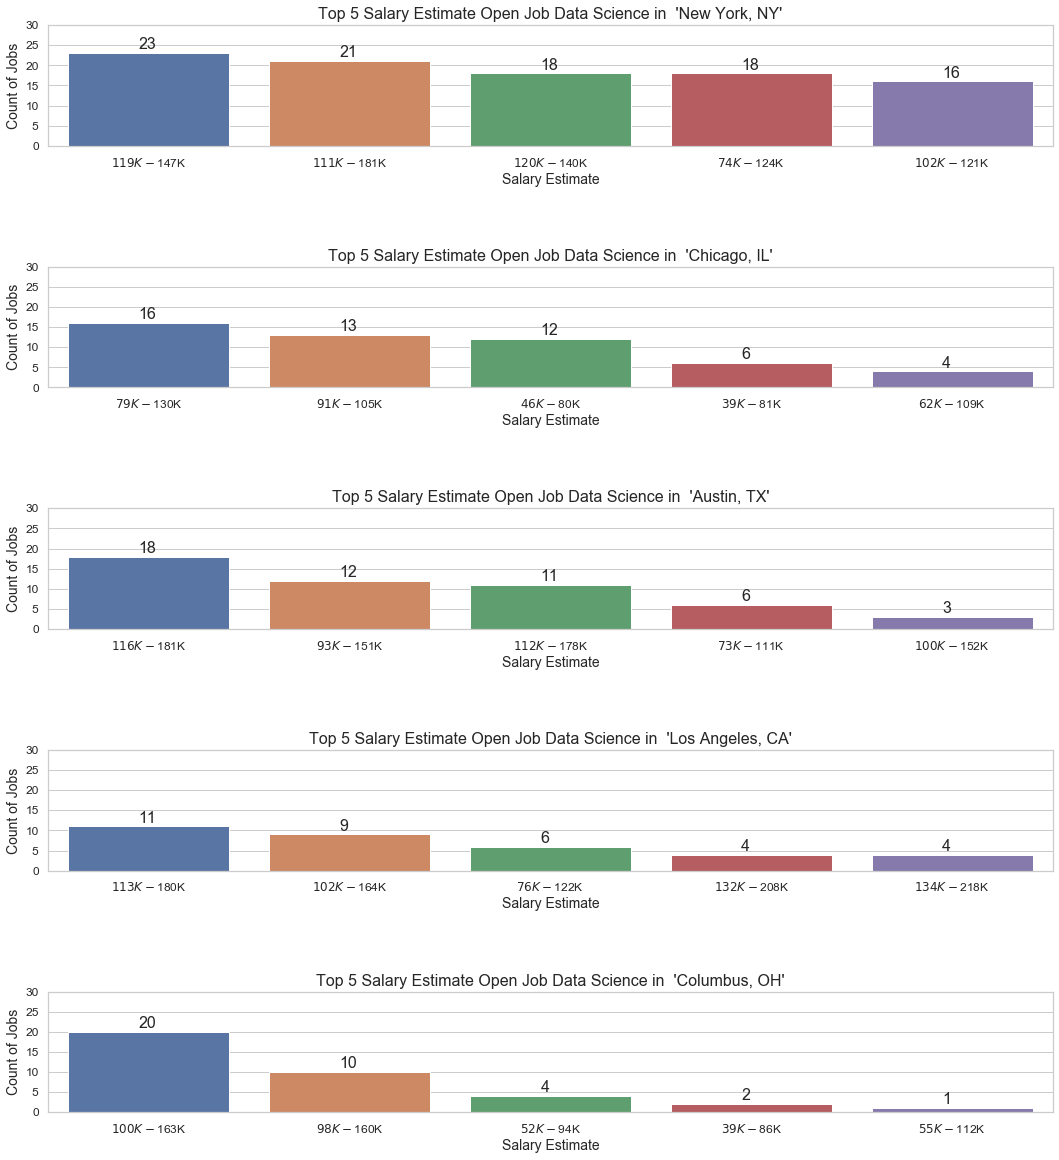

In [24]:
max_width = 15
fig, ax = plt.subplots(5,1 , figsize = (18,20))
for i in range(0,5):
    dataview1 = dataview.sort_values('Total', ascending = False).head(5)
    dataview1 = dataview1[i:i+1]
    dataview1.dropna(axis = 1, inplace = True)
    dataview1 = pd.melt(dataview1, 
                id_vars=['Location'], 
                value_vars=list(dataview1.columns[1:-1]), # list of days of the week
                var_name='Salary Estimate', 
                value_name='Sum of Value').sort_values('Sum of Value', ascending = False)
    
    dataview1 = dataview1.sort_values('Sum of Value', ascending = False).head(5)
    
    sns.barplot(ax=ax[i], data = dataview1, x ='Salary Estimate', y = 'Sum of Value')
    ax[i].set_title("Top 5 Salary Estimate Open Job Data Science in  '"+ dataview1.iloc[0,0]+"'", fontsize = 16)
    ax[i].set_xlabel('Salary Estimate', fontsize = 14)
    ax[i].set_ylabel('Count of Jobs', fontsize = 14)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 35, step = 5))
    ax[i].tick_params(labelsize = 12)

    
    for index,dataview1 in enumerate(dataview1['Sum of Value'].astype(int)):
        ax[i].text(x=index-0.05 , y =dataview1+1 , s=f"{dataview1}" , fontdict=dict(fontsize=16))
    fig.subplots_adjust(wspace = 0.1, hspace = 1)
plt.show()

# Salary

## Salary Vs Location

In [25]:
dataview_top=data.groupby('Location')[['Max Salary','Min Salary']].mean().sort_values(['Max Salary','Min Salary'],ascending=False).head(10)
dataview_top.reset_index(inplace = True)

dataview_bot=data.groupby('Location')[['Max Salary','Min Salary']].mean().sort_values(['Max Salary','Min Salary'],ascending=True).head(10)
dataview_bot.reset_index(inplace = True)

print(dataview_top, '\n')
print(dataview_bot)

               Location  Max Salary  Min Salary
0  Rockville Centre, NY  254.000000  156.000000
1            Newark, CA  214.000000  135.000000
2        Carrollton, TX  210.000000  134.000000
3    Franklin Lakes, NJ  210.000000  129.000000
4   Port Washington, NY  210.000000  129.000000
5      Sherman Oaks, CA  208.000000  132.000000
6      Redwood City, CA  201.928571  144.142857
7         Los Gatos, CA  200.500000  143.000000
8         Sunnyvale, CA  199.625000  154.250000
9        Menlo Park, CA  197.533333  137.066667 

                    Location  Max Salary  Min Salary
0                 Spring, TX        26.0        10.0
1               Stafford, TX        26.0        10.0
2             Sugar Land, TX        26.0        10.0
3               Elmhurst, IL        56.0        31.0
4             Naperville, IL        56.0        31.0
5        Fort Washington, PA        87.0        50.0
6  Stevenage, United Kingdom        87.0        50.0
7           Conshohocken, PA        89.8      

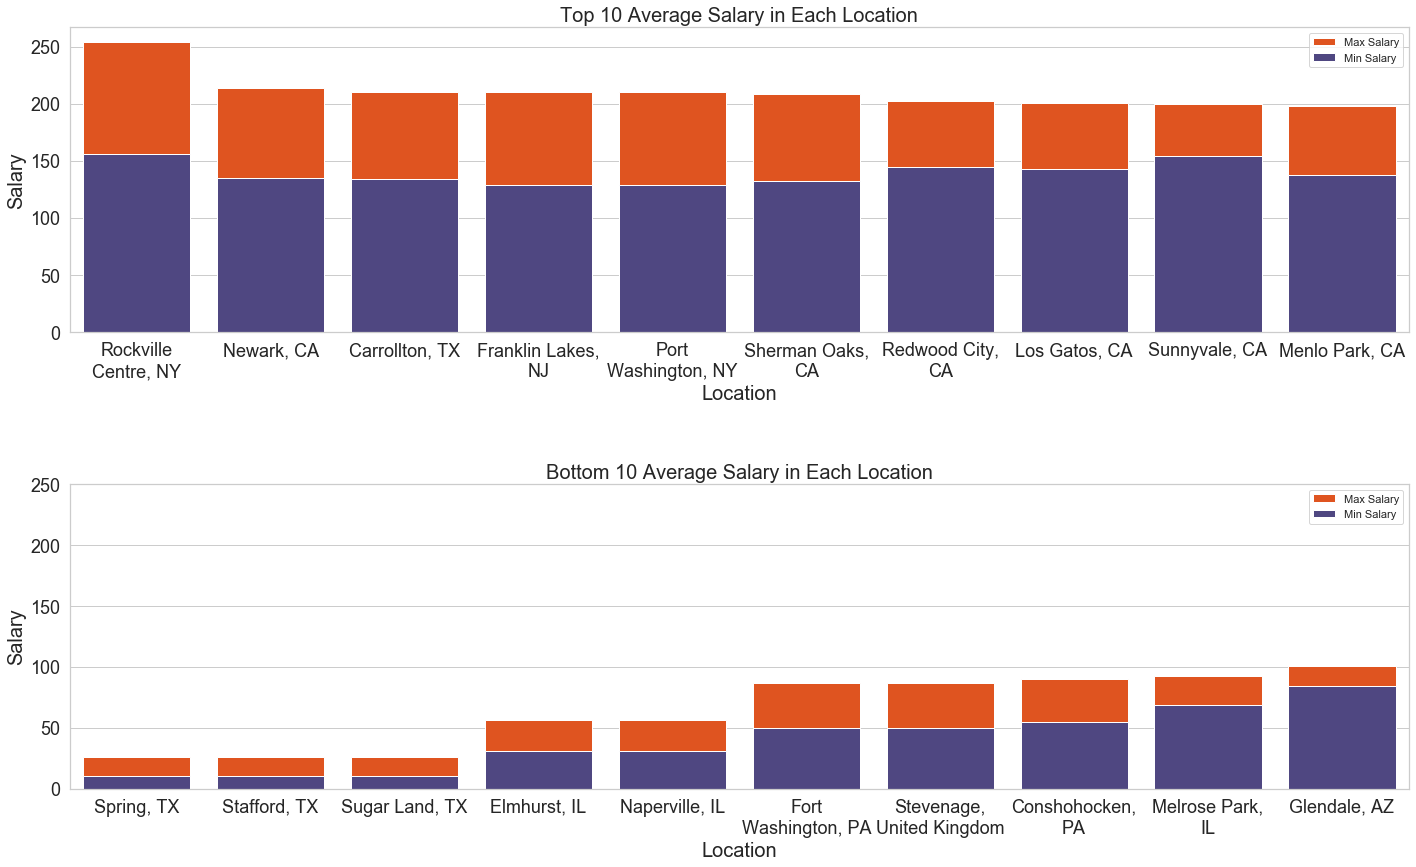

In [26]:
max_width = 15
data_salary = [dataview_top, dataview_bot]
data_title = ['Top 10', 'Bottom 10']
fig, ax = plt.subplots(2,1, figsize = (24,14))
fig.subplots_adjust(hspace = 0.5)
for i in range(0,2):
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Location', y = 'Max Salary', color = 'orangered', label = 'Max Salary')
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Location', y = 'Min Salary', color = 'darkslateblue', label = 'Min Salary')
    ax[i].legend()
    ax[i].set_title(data_title[i]+' Average Salary in Each Location', fontsize = 20)
    ax[i].set_ylabel('Salary', fontsize = 20)
    ax[i].set_xlabel('Location', fontsize = 20)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 300, step = 50))
    ax[i].tick_params(labelsize = 18)
    
plt.show()

## Salary Vs Sector

In [27]:
dataview_top=data.groupby('Sector')[['Max Salary','Min Salary']].mean().sort_values(['Max Salary','Min Salary'],ascending=False).head(10)
dataview_top.reset_index(inplace = True)

dataview_bot=data.groupby('Sector')[['Max Salary','Min Salary']].mean().sort_values(['Max Salary','Min Salary'],ascending=True).head(10)
dataview_bot.reset_index(inplace = True)

print(dataview_top, '\n')
print(dataview_bot)

                         Sector  Max Salary  Min Salary
0                 Manufacturing  164.736842  105.894737
1                   Real Estate  164.250000  108.500000
2           Aerospace & Defense  155.700000   99.400000
3     Biotech & Pharmaceuticals  154.500000  102.153846
4        Agriculture & Forestry  153.666667  129.000000
5        Information Technology  153.410448   99.569652
6  Oil, Gas, Energy & Utilities  152.363636   86.181818
7            Accounting & Legal  151.625000   86.000000
8                        Retail  151.500000  101.031250
9                   Health Care  148.866667   95.300000 

                              Sector  Max Salary  Min Salary
0  Restaurants, Bars & Food Services   78.000000   49.000000
1                 Telecommunications  118.250000   66.500000
2   Arts, Entertainment & Recreation  120.600000   64.200000
3                   Travel & Tourism  131.000000   75.000000
4                  Consumer Services  137.250000   91.250000
5         Transp

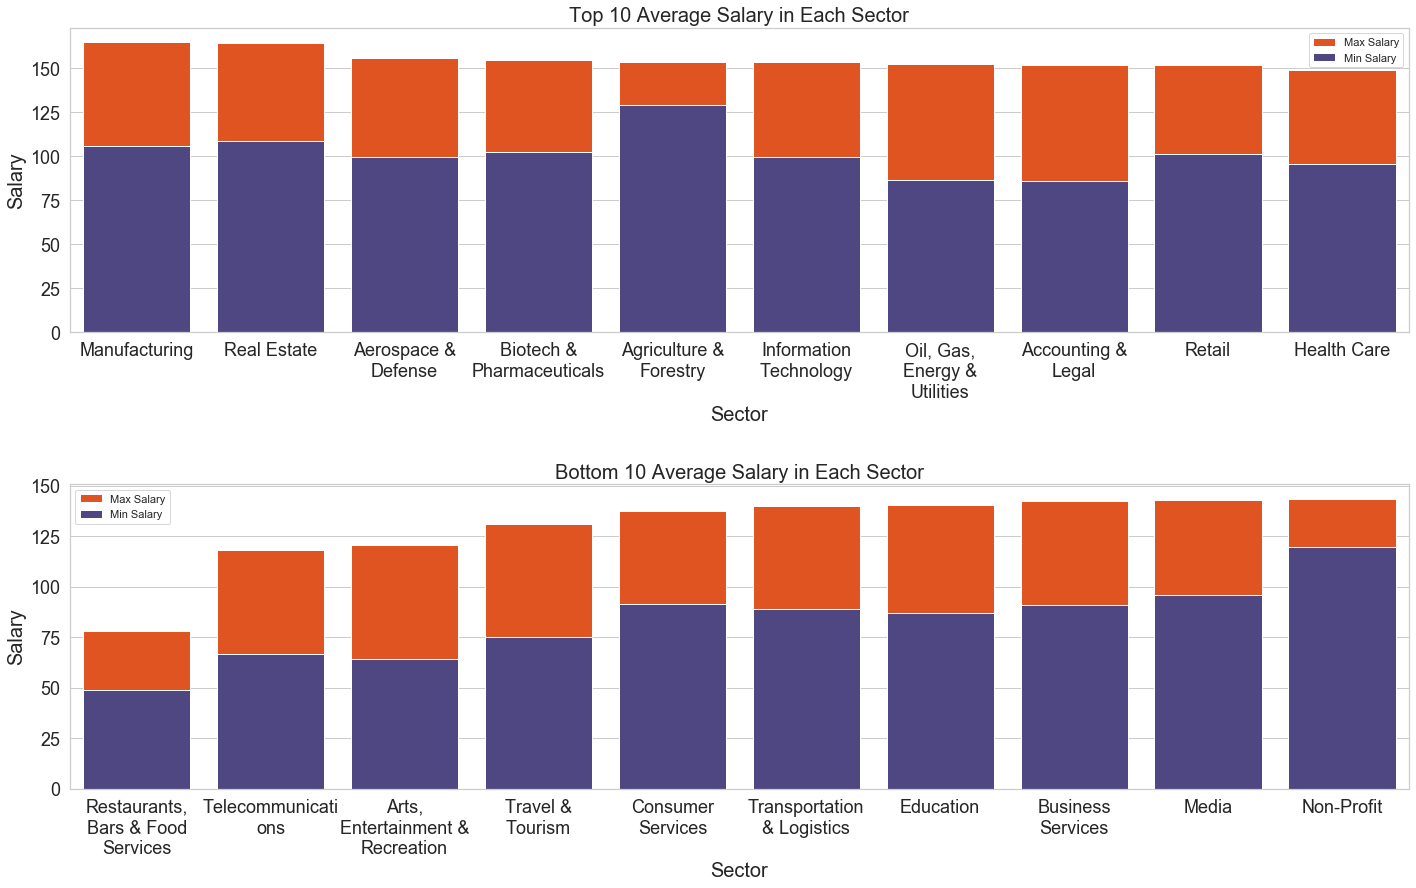

In [28]:
max_width = 15
data_salary = [dataview_top, dataview_bot]
data_title = ['Top 10', 'Bottom 10']
fig, ax = plt.subplots(2,1, figsize = (24,14))
fig.subplots_adjust(hspace = 0.5)
for i in range(0,2):
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Sector', y = 'Max Salary', color = 'orangered', label = 'Max Salary')
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Sector', y = 'Min Salary', color = 'darkslateblue', label = 'Min Salary')
    ax[i].legend()
    ax[i].set_title(data_title[i]+' Average Salary in Each Sector', fontsize = 20)
    ax[i].set_ylabel('Salary', fontsize = 20)
    ax[i].set_xlabel('Sector', fontsize = 20)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 175, step = 25))
    ax[i].tick_params(labelsize = 18)
    
plt.show()

## Salary Vs Industry

In [29]:
dataview_top=data.groupby('Industry')[['Max Salary','Min Salary']].mean().sort_values(['Max Salary','Min Salary'],ascending=False).head(10)
dataview_top.reset_index(inplace = True)

dataview_bot=data.groupby('Industry')[['Max Salary','Min Salary']].mean().sort_values(['Max Salary','Min Salary'],ascending=True).head(10)
dataview_bot.reset_index(inplace = True)

print(dataview_top, '\n')
print(dataview_bot)

                                   Industry  Max Salary  Min Salary
0    Transportation Equipment Manufacturing  185.666667  135.666667
1     Electrical & Electronic Manufacturing  181.000000  114.400000
2                           Travel Agencies  181.000000  111.000000
3            Financial Analytics & Research  180.000000  113.000000
4                 Transportation Management  180.000000  113.000000
5  Consumer Electronics & Appliances Stores  176.000000  145.000000
6             Food & Beverage Manufacturing  175.000000   90.000000
7                                 Utilities  175.000000   90.000000
8                     Farm Support Services  174.000000  148.000000
9          Financial Transaction Processing  173.000000  106.000000 

                                Industry  Max Salary  Min Salary
0  Fast-Food & Quick-Service Restaurants        78.0        49.0
1                           Cruise Ships        81.0        39.0
2                               Gambling        87.0   

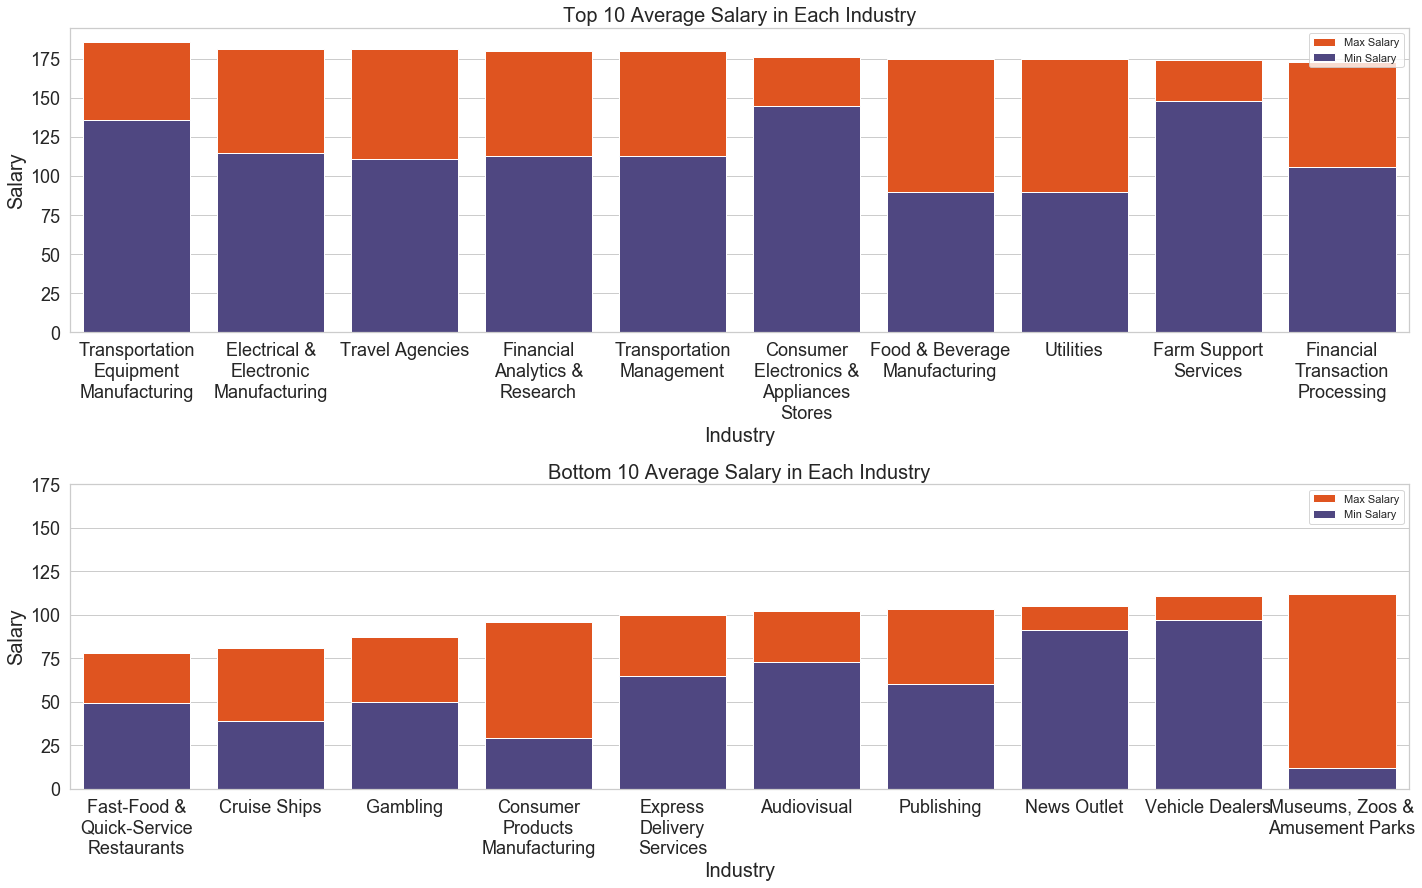

In [30]:
max_width = 15
data_salary = [dataview_top, dataview_bot]
data_title = ['Top 10', 'Bottom 10']
fig, ax = plt.subplots(2,1, figsize = (24,14))
fig.subplots_adjust(hspace = 0.5)
for i in range(0,2):
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Industry', y = 'Max Salary', color = 'orangered', label = 'Max Salary')
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Industry', y = 'Min Salary', color = 'darkslateblue', label = 'Min Salary')
    ax[i].legend()
    ax[i].set_title(data_title[i]+' Average Salary in Each Industry', fontsize = 20)
    ax[i].set_ylabel('Salary', fontsize = 20)
    ax[i].set_xlabel('Industry', fontsize = 20)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 200, step = 25))
    ax[i].tick_params(labelsize = 18)
    
plt.show()

# Easy Apply

In [31]:
dataview = data.groupby('Easy Apply')['Job Title'].count().reset_index()
dataview

,Easy Apply,Job Title
0,FALSE,831
1,TRUE,42


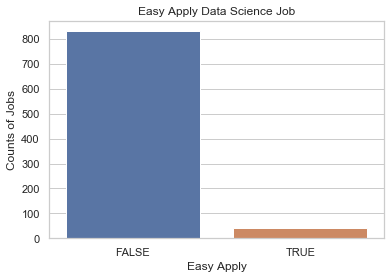

In [32]:
fig, ax = plt.subplots()
ax =sns.barplot(ax = ax, data = dataview, x = 'Easy Apply', y = 'Job Title' )
ax.set_title('Easy Apply Data Science Job')
ax.set_ylabel('Counts of Jobs')
plt.show()

# Revenue

In [33]:
data['Revenue'].unique().tolist()

[nan,
 '$100 to $500 million (USD)',
 '$500 million to $1 billion (USD)',
 '$10+ billion (USD)',
 '$25 to $50 million (USD)',
 '$5 to $10 billion (USD)',
 '$5 to $10 million (USD)',
 '$50 to $100 million (USD)',
 '$1 to $2 billion (USD)',
 '$2 to $5 billion (USD)',
 '$1 to $5 million (USD)',
 '$10 to $25 million (USD)',
 'Less than $1 million (USD)']

In [34]:
dataview = data.copy()
dataview['Revenue'].replace(['Unknown / Non-Applicable'], np.nan, inplace = True)
dataview['Revenue'].dropna(axis = 0, inplace = True)
dataview = dataview.groupby('Revenue')['Job Title'].count().reset_index()
dataview.sort_values('Job Title', ascending = False, inplace = True)
dataview

,Revenue,Job Title
3,$10+ billion (USD),261
4,$100 to $500 million (USD),73
7,$5 to $10 billion (USD),50
2,$10 to $25 million (USD),43
0,$1 to $2 billion (USD),39
5,$2 to $5 billion (USD),35
6,$25 to $50 million (USD),30
9,$50 to $100 million (USD),22
1,$1 to $5 million (USD),21
10,$500 million to $1 billion (USD),18


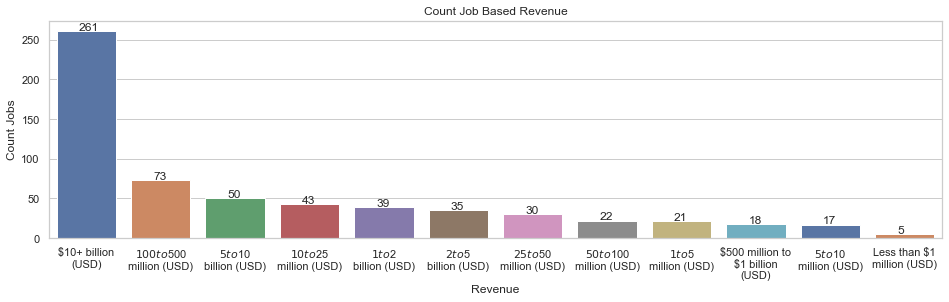

In [35]:
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
sns.barplot(ax = ax, data = dataview, x='Revenue', y = 'Job Title', palette = 'deep')
ax.set_title('Count Job Based Revenue')
ax.set_ylabel('Count Jobs')
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
for index,dataview in enumerate(dataview['Job Title'].astype(int)):
        ax.text(x=index-0.1 , y =dataview+1 , s=f"{dataview}" , fontdict=dict(fontsize=12))
plt.show()

## Rating

In [36]:
dataview = data.groupby('Rating')['Job Title'].count().reset_index()
dataview.sort_values('Job Title', ascending = False).head()

,Rating,Job Title
15,3.7,85
17,3.9,85
19,4.1,69
14,3.6,67
20,4.2,67


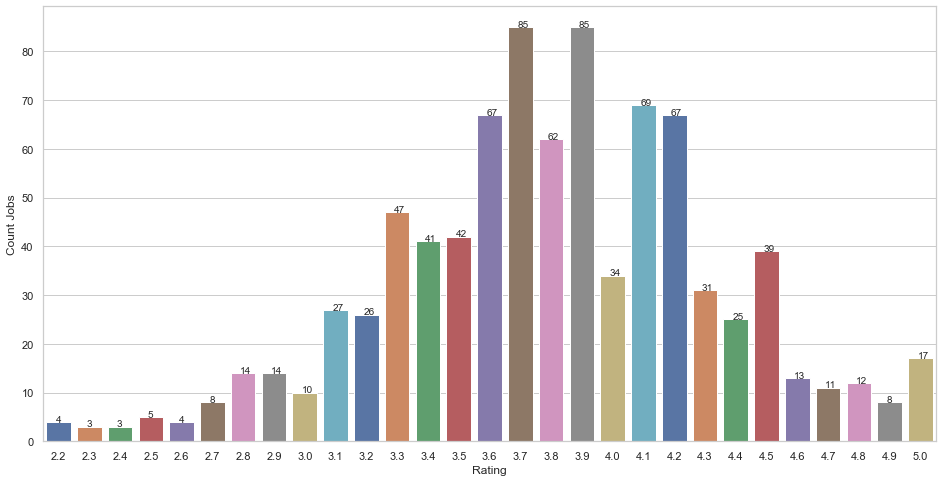

In [37]:
fig, ax = plt.subplots(figsize = (16, 8))
#sns.barplot(ax = ax, data = dataview, x = 'Rating', y = 'Job Title', order = dataview.sort_values('Job Title', ascending = False).Rating)
sns.barplot(ax = ax, data = dataview, x = 'Rating', y = 'Job Title', palette = 'deep')
ax.set_ylabel('Count Jobs')
for index,dataview in enumerate(dataview['Job Title'].astype(int)):
        ax.text(x=index-0.1 , y =dataview , s=f"{dataview}" , fontdict=dict(fontsize=10))
plt.show()

## Rating vs Location

In [38]:
dataview_top = data.groupby('Location')['Rating'].mean().reset_index()
dataview_top = dataview_top.sort_values('Rating', ascending = False).head(10)

dataview_bot = data.groupby('Location')['Rating'].mean().reset_index()
dataview_bot = dataview_bot.sort_values('Rating', ascending = True).head(10)

print(dataview_top, '\n' )
print(dataview_bot)

          Location  Rating
46   Livermore, CA    4.70
61     Newtown, PA    4.60
10      Camden, NJ    4.50
52  Menlo Park, CA    4.42
44      Lemont, IL    4.30
7     Brooklyn, NY    4.30
0      Addison, TX    4.20
32    Glendale, AZ    4.20
33    Glendale, CA    4.20
53        Mesa, AZ    4.20 

                Location  Rating
25      Florham Park, NJ    2.60
57        Naperville, IL    2.60
2              Alvin, TX    2.90
62        Northbrook, IL    2.98
51      Melrose Park, IL    3.10
71  Rockville Centre, NY    3.10
12        Carrollton, TX    3.10
92      West Chester, PA    3.20
50           Malvern, PA    3.24
39         Irwindale, CA    3.30


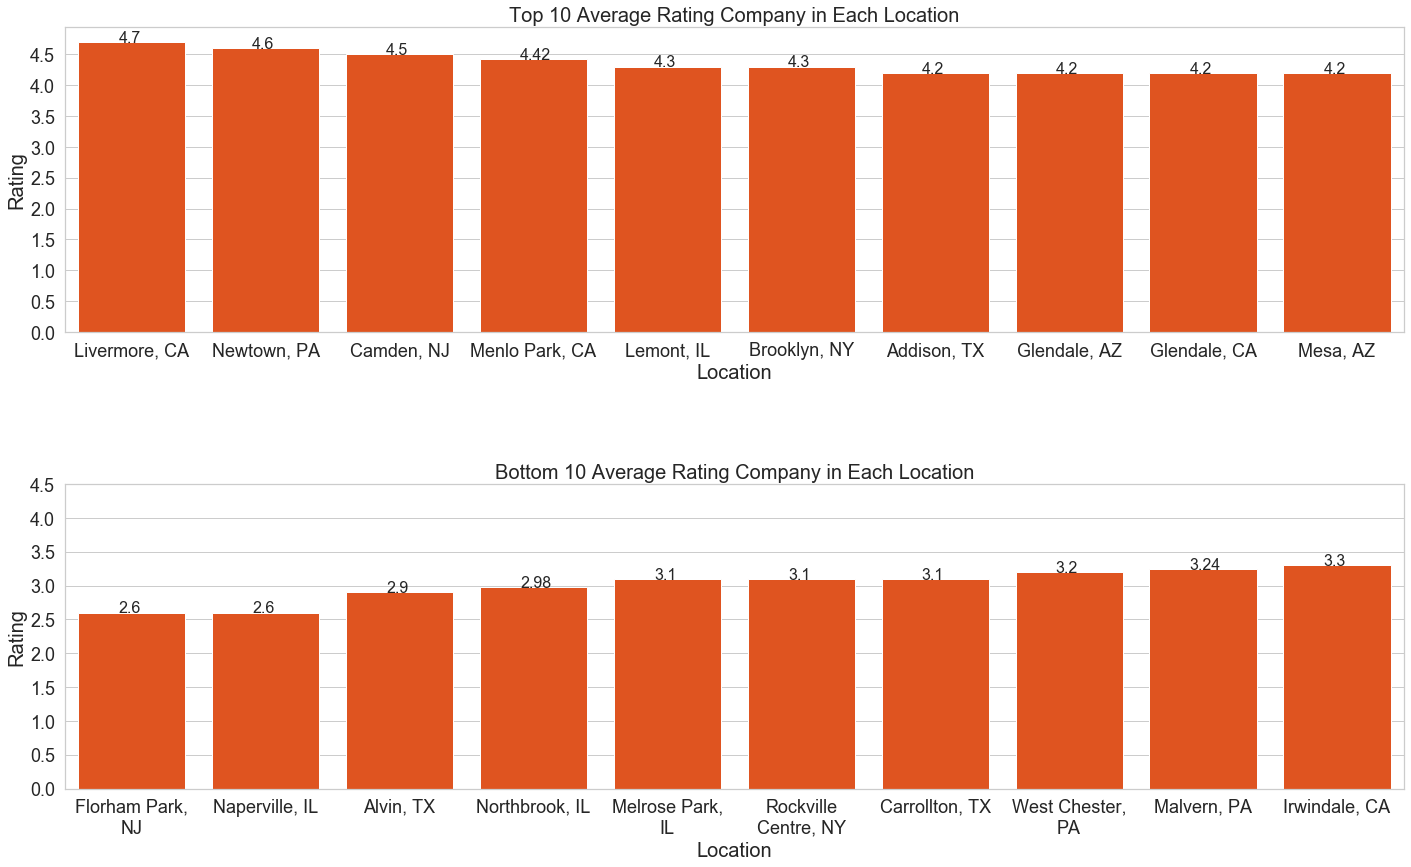

In [39]:
max_width = 15
data_rating = [dataview_top, dataview_bot]
data_title = ['Top 10', 'Bottom 10']
fig, ax = plt.subplots(2,1, figsize = (24,14))
fig.subplots_adjust(hspace = 0.5)
for i in range(0,2):
    sns.barplot(ax = ax[i], data = data_rating[i], x = 'Location', y = 'Rating', color = 'orangered', label = 'Rating')
    ax[i].set_title(data_title[i]+' Average Rating Company in Each Location', fontsize = 20)
    ax[i].set_ylabel('Rating', fontsize = 20)
    ax[i].set_xlabel('Location', fontsize = 20)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 5, step = 0.5))
    for index, data_rating[i] in enumerate(np.round(data_rating[i]['Rating'], 2)):
        ax[i].text(x=index-0.1 , y =data_rating[i] , s=f"{data_rating[i]}" , fontdict=dict(fontsize=16))
    ax[i].tick_params(labelsize = 18)
    
plt.show()

## Rating vs Sector

In [40]:
dataview_top = data.groupby('Sector')['Rating'].mean().reset_index()
dataview_top = dataview_top.sort_values('Rating', ascending = False).head(10)

dataview_bot = data.groupby('Sector')['Rating'].mean().reset_index()
dataview_bot = dataview_bot.sort_values('Rating', ascending = True).head(10)

print(dataview_top, '\n' )
print(dataview_bot)

                               Sector    Rating
6                   Consumer Services  4.250000
2              Agriculture & Forestry  4.233333
7                           Education  4.081250
18  Restaurants, Bars & Food Services  4.000000
11             Information Technology  3.962687
21         Transportation & Logistics  3.950000
17                        Real Estate  3.950000
5                   Business Services  3.786290
0                  Accounting & Legal  3.762500
15                         Non-Profit  3.750000 

                              Sector    Rating
20                Telecommunications  3.050000
16      Oil, Gas, Energy & Utilities  3.254545
22                  Travel & Tourism  3.400000
19                            Retail  3.446875
12                         Insurance  3.511321
10                       Health Care  3.536667
3   Arts, Entertainment & Recreation  3.540000
14                             Media  3.633333
8                            Finance  3.664516


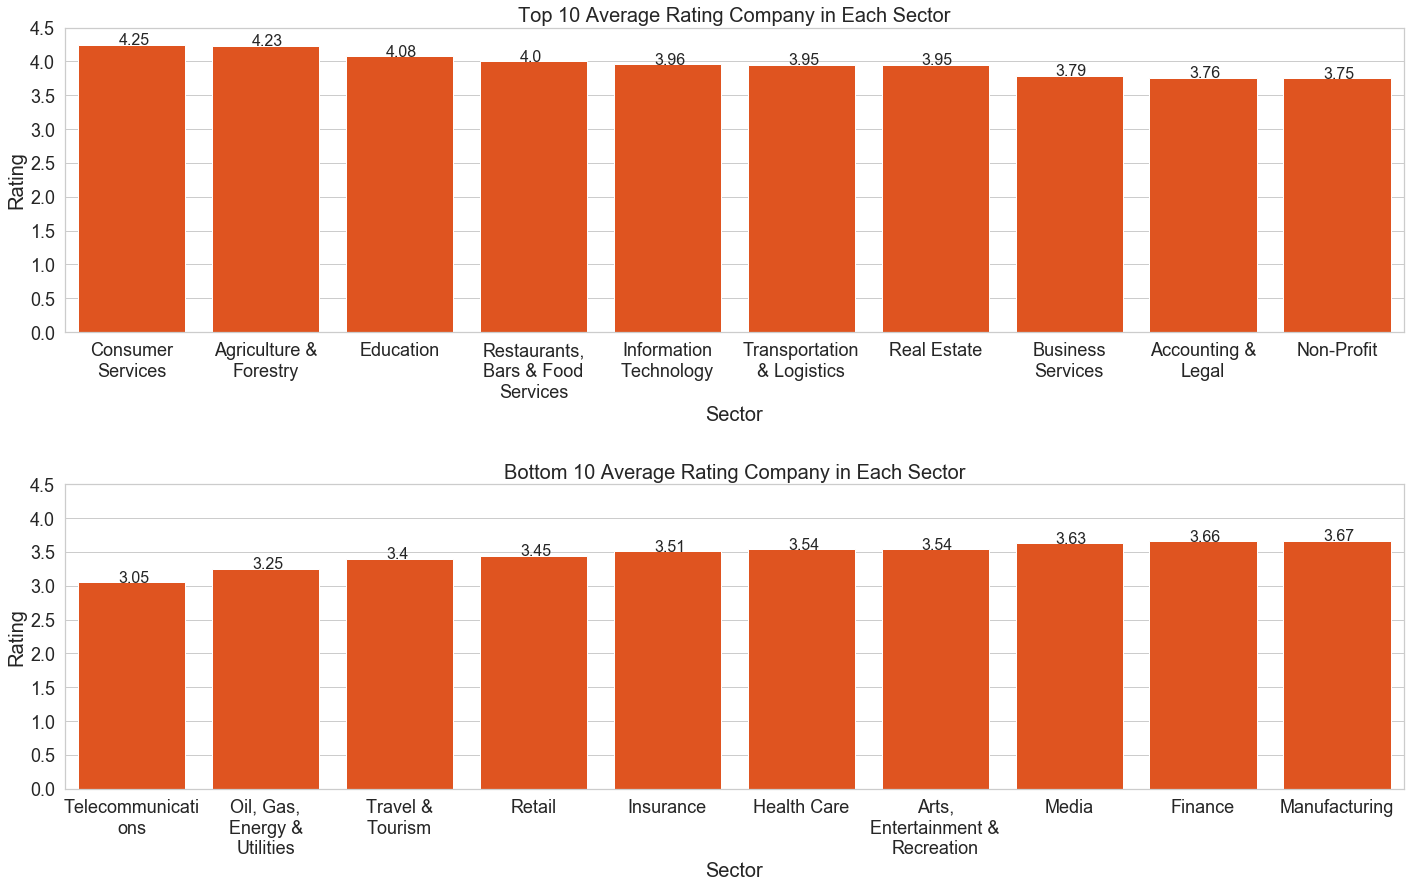

In [41]:
max_width = 15
data_rating = [dataview_top, dataview_bot]
data_title = ['Top 10', 'Bottom 10']
fig, ax = plt.subplots(2,1, figsize = (24,14))
fig.subplots_adjust(hspace = 0.5)
for i in range(0,2):
    sns.barplot(ax = ax[i], data = data_rating[i], x = 'Sector', y = 'Rating', color = 'orangered', label = 'Rating')
    ax[i].set_title(data_title[i]+' Average Rating Company in Each Sector', fontsize = 20)
    ax[i].set_ylabel('Rating', fontsize = 20)
    ax[i].set_xlabel('Sector', fontsize = 20)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 5, step = 0.5))
    for index, data_rating[i] in enumerate(np.round(data_rating[i]['Rating'], 2)):
        ax[i].text(x=index-0.1 , y =data_rating[i] , s=f"{data_rating[i]}" , fontdict=dict(fontsize=16))
    ax[i].tick_params(labelsize = 18)
    
plt.show()

## Rating vs Industry

In [42]:
dataview_top = data.groupby('Industry')['Rating'].mean().reset_index()
dataview_top = dataview_top.sort_values('Rating', ascending = False).head(10)

dataview_bot = data.groupby('Industry')['Rating'].mean().reset_index()
dataview_bot = dataview_bot.sort_values('Rating', ascending = True).head(10)

print(dataview_top, '\n' )
print(dataview_bot)

                                  Industry    Rating
9            Building & Personnel Services  4.900000
32                         Food Production  4.600000
66               Transportation Management  4.500000
38               Health, Beauty, & Fitness  4.466667
12                 Colleges & Universities  4.133333
62                  Staffing & Outsourcing  4.117391
65  Transportation Equipment Manufacturing  4.050000
20             Education Training Services  4.014286
44                                Internet  4.011888
26   Fast-Food & Quick-Service Restaurants  4.000000 

                                 Industry    Rating
10  Cable, Internet & Telephone Providers  2.400000
50                            News Outlet  2.700000
68                              Utilities  2.800000
34                           Gas Stations  2.900000
30          Food & Beverage Manufacturing  2.900000
54              Pet & Pet Supplies Stores  2.900000
71                              Wholesale  2.960000

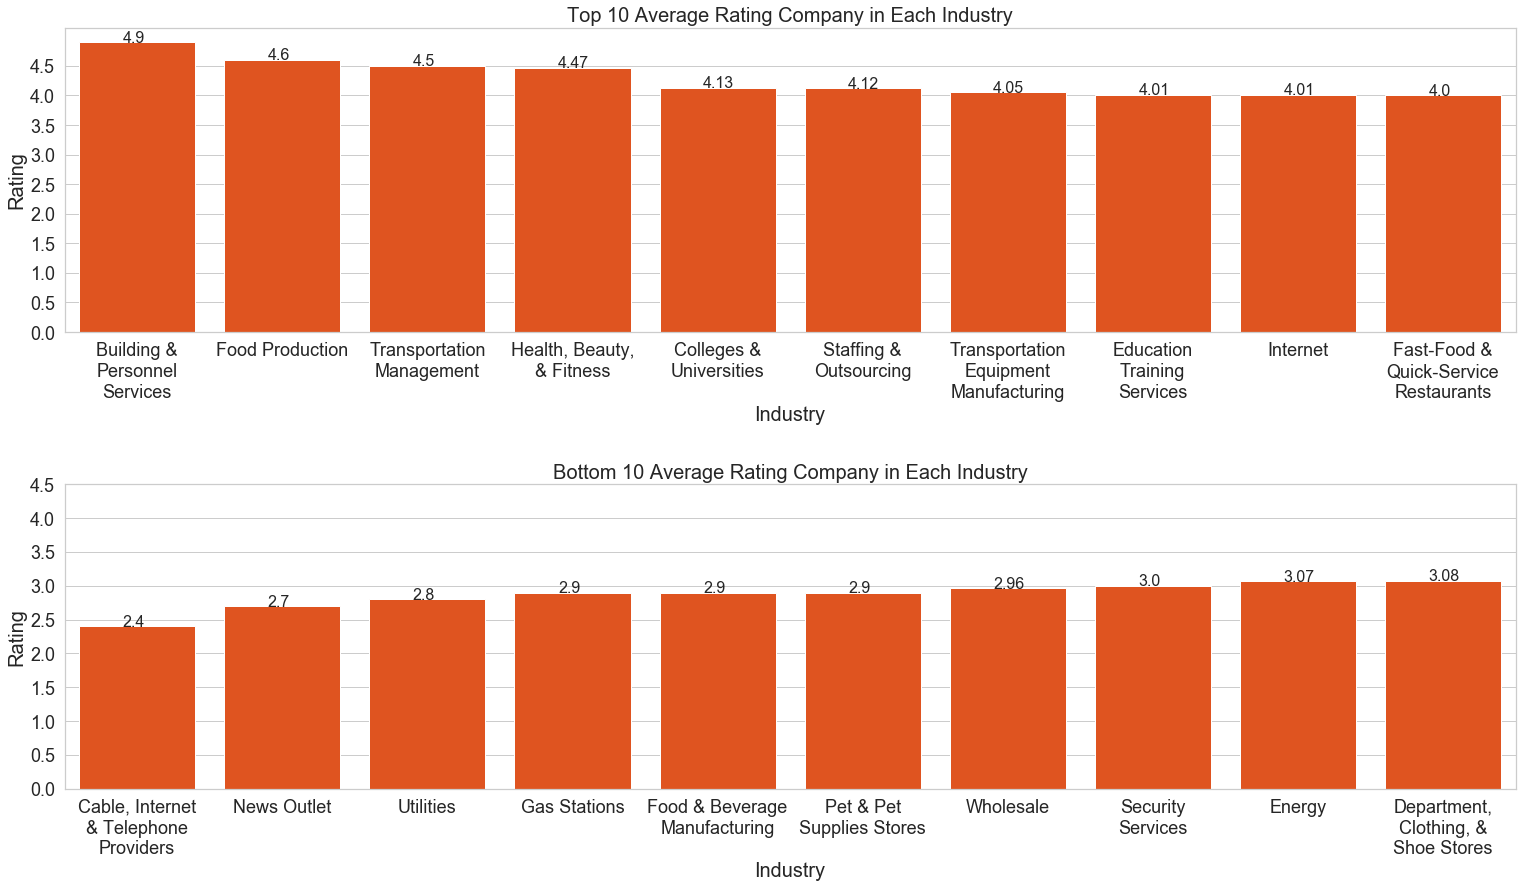

In [43]:
max_width = 15
data_rating = [dataview_top, dataview_bot]
data_title = ['Top 10', 'Bottom 10']
fig, ax = plt.subplots(2,1, figsize = (26,14))
fig.subplots_adjust(hspace = 0.5)
for i in range(0,2):
    sns.barplot(ax = ax[i], data = data_rating[i], x = 'Industry', y = 'Rating', color = 'orangered', label = 'Rating')
    ax[i].set_title(data_title[i]+' Average Rating Company in Each Industry', fontsize = 20)
    ax[i].set_ylabel('Rating', fontsize = 20)
    ax[i].set_xlabel('Industry', fontsize = 20)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 5, step = 0.5))
    for index, data_rating[i] in enumerate(np.round(data_rating[i]['Rating'], 2)):
        ax[i].text(x=index-0.1 , y =data_rating[i] , s=f"{data_rating[i]}" , fontdict=dict(fontsize=16))
    ax[i].tick_params(labelsize = 18)
    
plt.show()